# Deep Learning For Traffic Sign Classification

## Project Overview

The "Deep Learning for Traffic Sign Classification" project focuses on creating a robust deep convolutional neural network (CNN) to accurately classify traffic sign images into 43 distinct categories. This classification is crucial for the development of self-driving cars, enabling them to recognize and respond to traffic signs in real-time. The project involves preprocessing the dataset, building and training a CNN model, and evaluating its performance. The dataset used contains 32x32 pixel colored images, each consisting of 3 RGB channels (Red, Green, and Blue).

- Traffic dign claaification is an important task for self driving cars.
- In this project, we will train a Deep Convolutional Neural network (CNN) to classify traffic sign images.
- The Dataset contains 43 different classes of images.
- Inputs & Outputs : Images are 32 * 32 pixels 
                     Colored images consist of 3 RGB channels for red, green andblue colors
                     

### Steps involved in the "Deep Learning for Traffic Sign Classification" project:

1. **Dataset Loading**: Load the training, validation, and testing datasets using the `pickle` library.

2. **Data Exploration**: Visualize a random sample of images from the training dataset.

3. **Image Visualization in Grid**: Display multiple images in a grid format for an overview of different traffic sign images.

4. **Data Preprocessing**:
   - Shuffle the dataset.
   - Convert RGB images to grayscale.
   - Normalize the grayscale images.

5. **Model Building**:
   - Construct a Convolutional Neural Network (CNN) using TensorFlow's Keras API.
   - Include convolutional layers, pooling layers, dropout layers, and dense layers.

6. **Model Training**:
   - Train the CNN model on the preprocessed images.
   - Use a batch size of 500 and train for 50 epochs.
   - Validate the model on the validation dataset during training.

7. **Model Evaluation**: Assess the model's performance using accuracy and loss metrics on the validation dataset.

8. **Result Interpretation**: Analyze the model's accuracy and loss across epochs to determine its effectiveness.

## Import Libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [5]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_validation.shape

(4410, 32, 32, 3)

In [10]:
y_validation.shape

(4410,)

In [11]:
X_test.shape

(12630, 32, 32, 3)

In [12]:
y_test.shape

(12630,)

## Perform image visualization

13

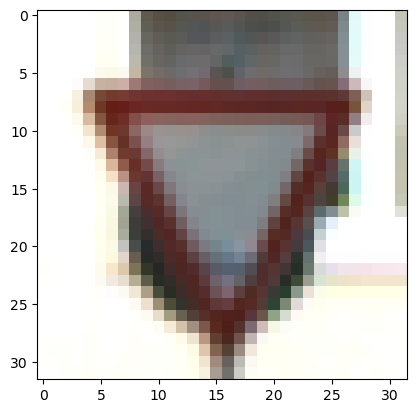

In [13]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

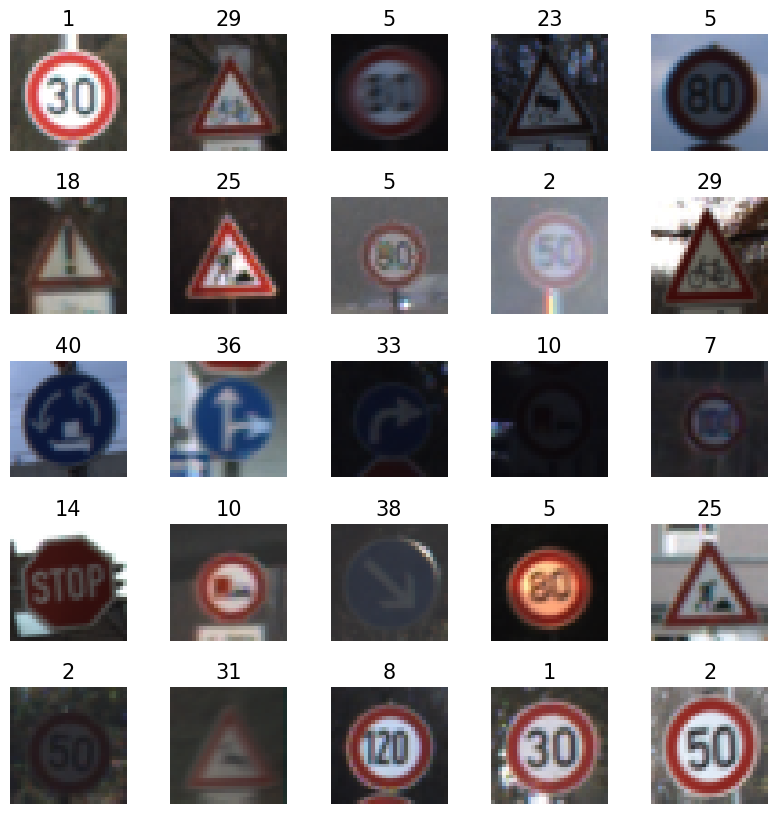

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid *L_grid):
    
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace =0.4)

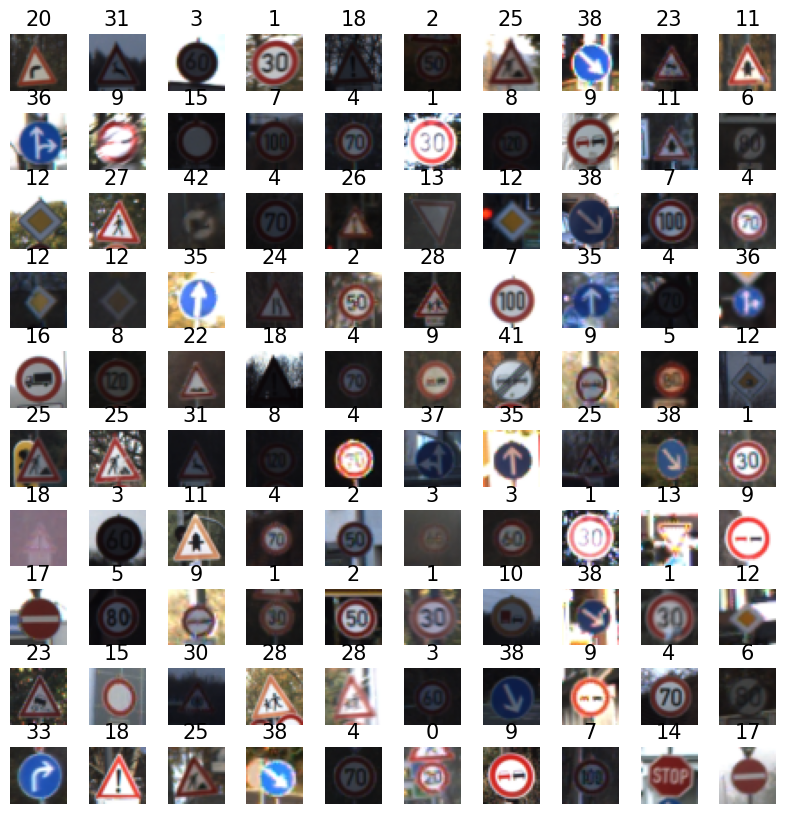

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid *L_grid):
    
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace =0.4)

## Convert images to gray-scale and perform normalization

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [17]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [20]:
X_train_gray_norm

array([[[[ 0.13802083],
         [ 0.12760417],
         [ 0.11979167],
         ...,
         [-0.92708333],
         [-0.92708333],
         [-0.93229167]],

        [[ 0.0234375 ],
         [ 0.078125  ],
         [ 0.09375   ],
         ...,
         [-0.92447917],
         [-0.921875  ],
         [-0.92447917]],

        [[-0.40364583],
         [-0.33333333],
         [-0.20572917],
         ...,
         [-0.92447917],
         [-0.92447917],
         [-0.92708333]],

        ...,

        [[-0.79427083],
         [-0.79427083],
         [-0.7890625 ],
         ...,
         [-0.9140625 ],
         [-0.921875  ],
         [-0.921875  ]],

        [[-0.8203125 ],
         [-0.80729167],
         [-0.79166667],
         ...,
         [-0.91666667],
         [-0.91666667],
         [-0.921875  ]],

        [[-0.83854167],
         [-0.83072917],
         [-0.83854167],
         ...,
         [-0.92447917],
         [-0.921875  ],
         [-0.91145833]]],


       [[[-0.40625   ],


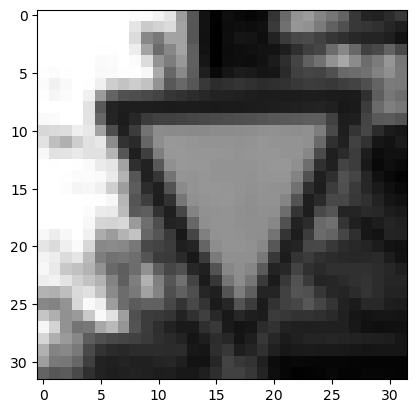

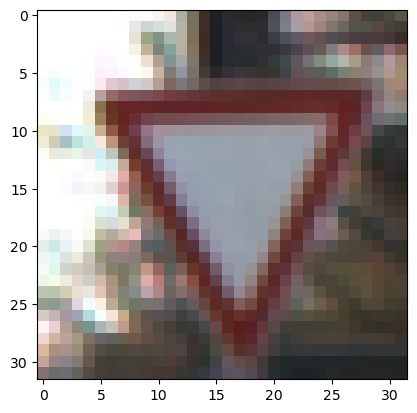

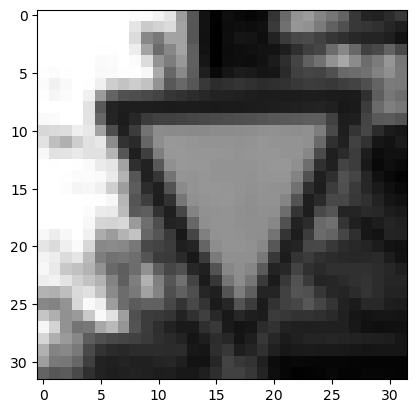

In [21]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## Build a deep convolutional network model  using Keras

In [25]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN .add(layers.Conv2D(6, (5,5), activation ='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation ='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       141,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,215 (606.31 KB)

 Trainable params: 155,215 (606.31 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN .add(layers.Conv2D(6, (5,5), activation ='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation ='relu'))
CNN.add(layers.AveragePooling2D(pool_size=(2, 2)))
        
CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation ='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train deep convolutional network model

In [27]:
CNN.compile(optimizer ='Adam', loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

In [28]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose =1,
                 validation_data =(X_validation_gray_norm, y_validation))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.1086 - loss: 3.4446 - val_accuracy: 0.3610 - val_loss: 2.3455
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5057 - loss: 1.7948 - val_accuracy: 0.6644 - val_loss: 1.2295
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.7044 - loss: 1.0154 - val_accuracy: 0.7331 - val_loss: 0.9319
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.7809 - loss: 0.7606 - val_accuracy: 0.7603 - val_loss: 0.8235
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.8110 - loss: 0.6280 - val_accuracy: 0.7887 - val_loss: 0.6908


In [29]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose =1,
                 validation_data =(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8454 - loss: 0.5286 - val_accuracy: 0.8054 - val_loss: 0.6715
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8660 - loss: 0.4635 - val_accuracy: 0.8322 - val_loss: 0.6263
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8804 - loss: 0.4135 - val_accuracy: 0.8392 - val_loss: 0.5991
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8995 - loss: 0.3621 - val_accuracy: 0.8433 - val_loss: 0.5686
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9059 - loss: 0.3331 - val_accuracy: 0.8488 - val_loss: 0.5540
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9160 - loss: 0.2944 - val_accuracy: 0.8497 - val_loss: 0.5553
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9234 - loss: 0.2684 - val_accuracy: 0.8617 - val_loss: 0.5288
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9299 - loss: 0.2459 - val_accuracy: 0.8719 - v

## Assess trained model performance

In [30]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8993 - loss: 0.7296
Test Accuracy: 0.8993666172027588


In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

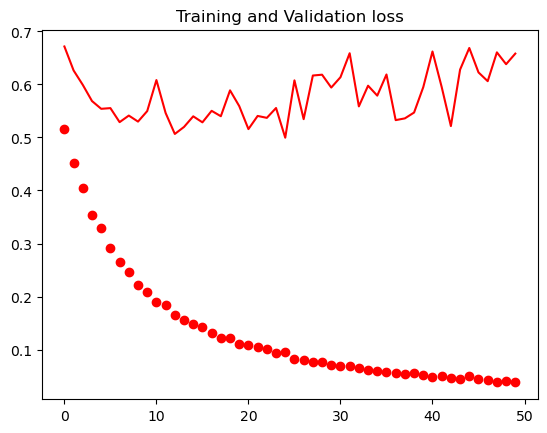

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation Loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

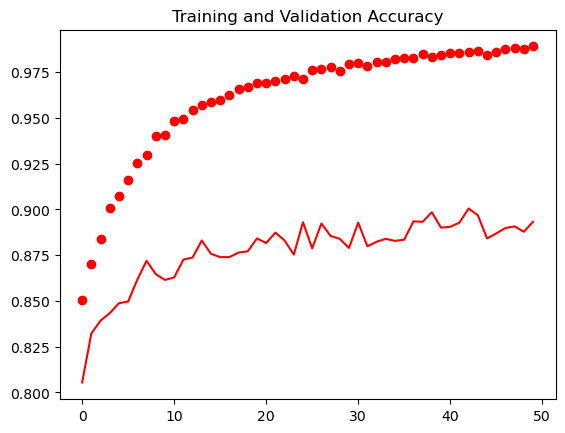

In [34]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label ='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')

In [43]:
predicted_probabilities = CNN.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

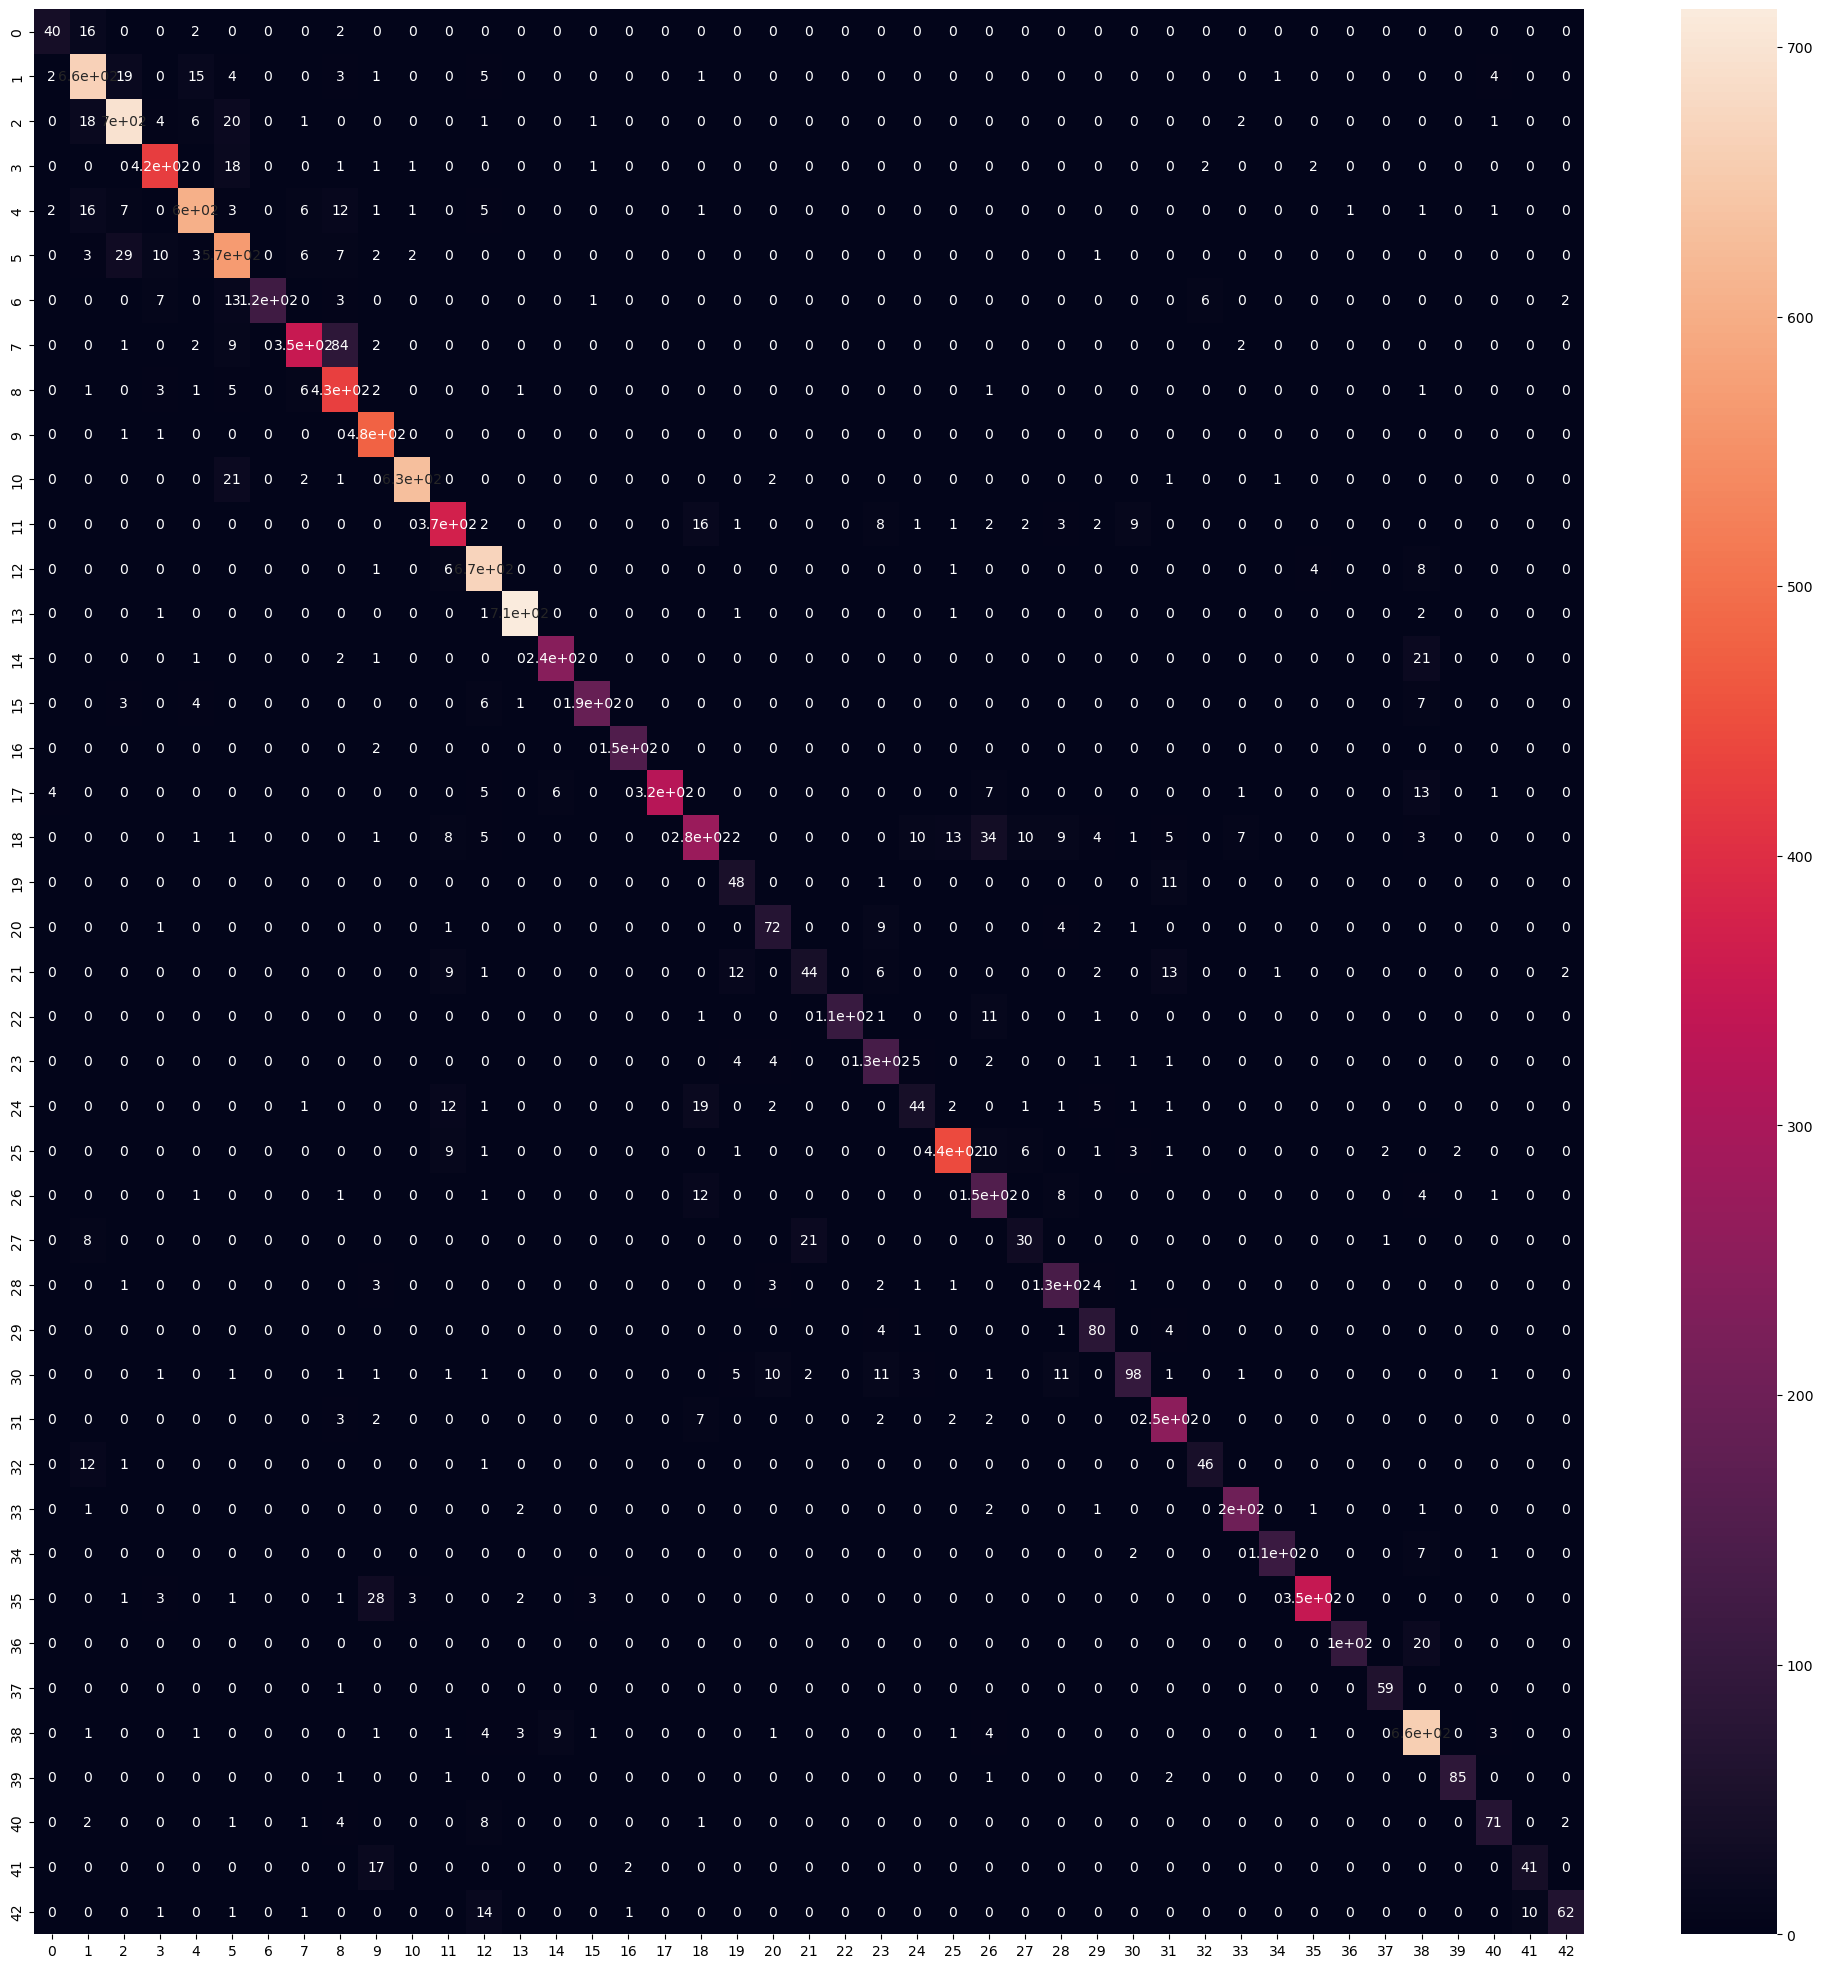

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

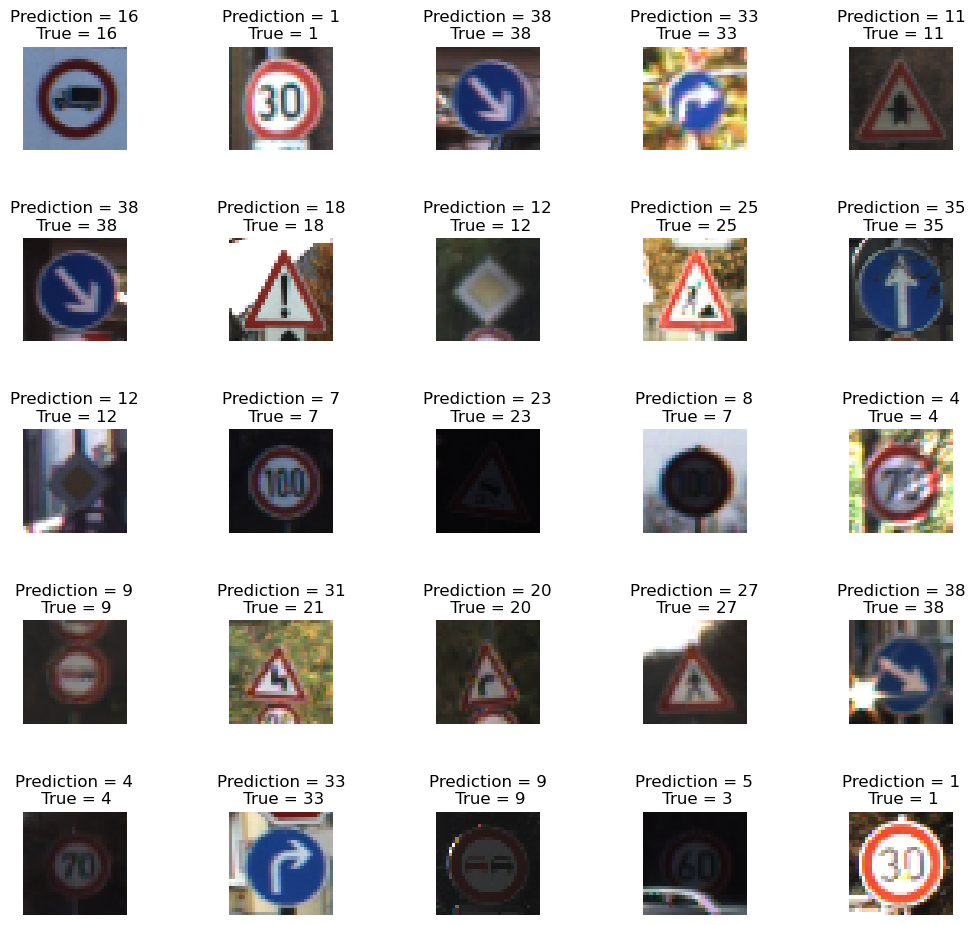

In [45]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

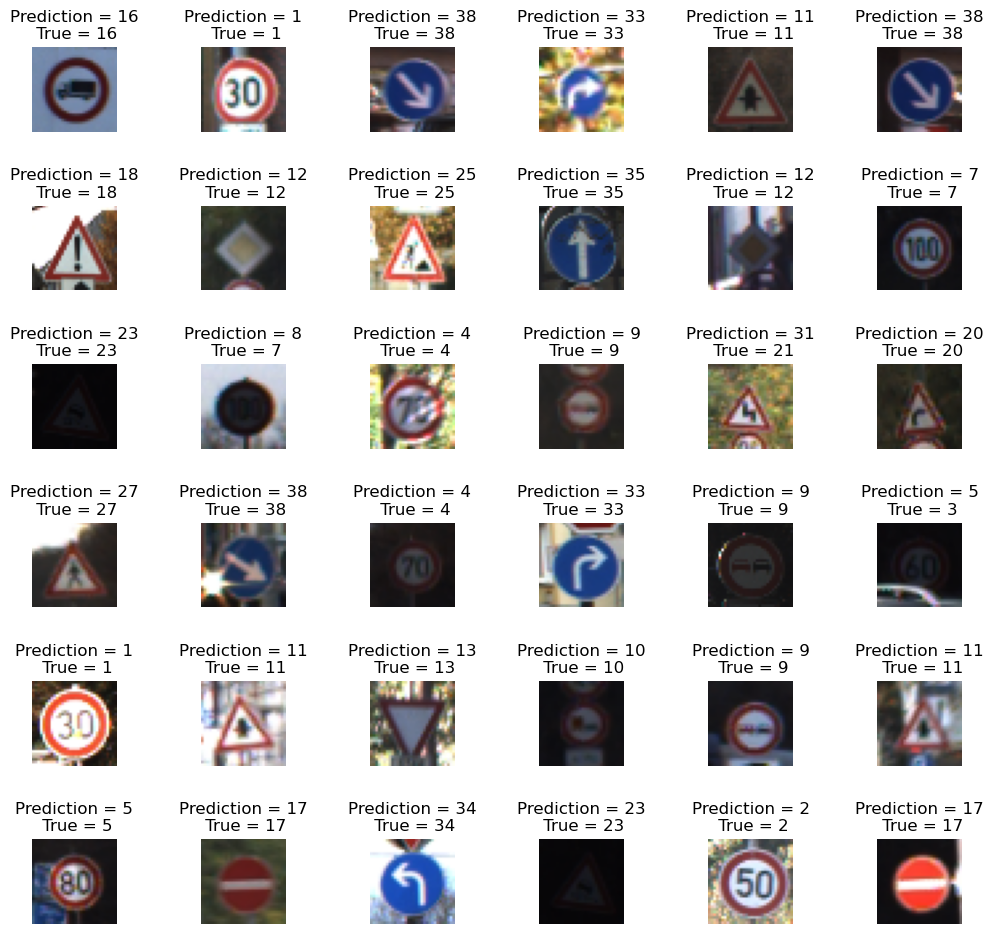

In [48]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

## Appendix

- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

### Conclusion and Insights of the Project

**Conclusion:**
The "Deep Learning for Traffic Sign Classification" project successfully demonstrates the application of Convolutional Neural Networks (CNNs) in classifying traffic signs with high accuracy. By preprocessing the images, converting them to grayscale, and normalizing the pixel values, the model was able to effectively learn distinguishing features of traffic signs. The model's architecture, with its combination of convolutional, pooling, dropout, and dense layers, allowed it to achieve good generalization on unseen data, as evidenced by its performance on the validation dataset.

**Insights:**

1. **Importance of Data Preprocessing**: 
   - Converting images to grayscale and normalizing them significantly reduced computational complexity without compromising the model's ability to learn. This step also highlighted the importance of proper data preparation in deep learning projects.

2. **Model Architecture**:
   - The CNN architecture proved effective in capturing spatial hierarchies in images, which is crucial for tasks like traffic sign classification. The use of dropout layers helped prevent overfitting, ensuring the model's robustness on new data.

3. **Training Efficiency**:
   - Training the model with a large batch size (500) and for multiple epochs (50) allowed for a thorough learning process. However, careful monitoring of the loss and accuracy metrics was necessary to avoid overfitting, which could have degraded the model's performance.

4. **Application Potential**:
   - The successful classification of traffic signs using this CNN model demonstrates its potential applicability in real-world scenarios, such as autonomous vehicles and traffic monitoring systems, where accurate and fast recognition of traffic signs is critical.

5. **Areas for Improvement**:
   - While the model performed well, future improvements could involve experimenting with more complex architectures, fine-tuning hyperparameters, or applying data augmentation techniques to further enhance accuracy and generalization.

This project provided valuable hands-on experience with deep learning, specifically in image classification tasks, and reinforced the importance of each step in the deep learning pipeline—from data preprocessing to model evaluation.